<a href="https://colab.research.google.com/github/Ankita158656/Chronic-Kidney-Disease-/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Data Preprocessing & Exploration
	1.	Load the dataset and display the first few rows.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder



file_path = "Chronic_Kidney_Dsease_data (1).csv"
df = pd.read_csv(file_path)
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


changing the data type of DoctoriInCharge column from categorical to int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['DoctorInCharge'] = le.fit_transform(df['DoctorInCharge']) # Changed X to df
print(df.dtypes)



PatientID                          int64
Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryKidneyDisease         int64
FamilyHistoryHypertension          int64
FamilyHistoryDiabetes              int64
PreviousAcuteKidneyInjury          int64
UrinaryTractInfections             int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float64
GFR                              float64
ProteinInUrine  

DETECTING AND HANDLING MISSING VALUES

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values[missing_values > 0])


Missing values per column:
 Series([], dtype: int64)


SUMMARY STATISTICS

In [ ]:
summary_stats = df.describe()
target_distribution = df["Diagnosis"].value_counts(normalize=True) * 100
summary_stats, target_distribution


(         PatientID          Age       Gender   Ethnicity  SocioeconomicStatus  \
 count  1659.000000  1659.000000  1659.000000  1659.00000          1659.000000   
 mean    830.000000    54.441230     0.515371     0.71308             0.977697   
 std     479.056364    20.549757     0.499914     1.00043             0.776686   
 min       1.000000    20.000000     0.000000     0.00000             0.000000   
 25%     415.500000    36.000000     0.000000     0.00000             0.000000   
 50%     830.000000    54.000000     1.000000     0.00000             1.000000   
 75%    1244.500000    72.000000     1.000000     1.00000             2.000000   
 max    1659.000000    90.000000     1.000000     3.00000             2.000000   
 
        EducationLevel          BMI      Smoking  AlcoholConsumption  \
 count     1659.000000  1659.000000  1659.000000         1659.000000   
 mean         1.693189    27.620049     0.292948            9.969831   
 std          0.910611     7.288670     0.45

In [ ]:
ummary_stats = df.describe()
summary_stats

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.0
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,...,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626,0.0
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,...,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492,0.0
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,...,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000,0.0
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,...,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000,0.0
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,...,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000,0.0
75%,1244.500000,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,...,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000,0.0
max,1659.000000,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,...,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000,0.0


Data distributions (histograms, box plots)

<Figure size 1500x1000 with 0 Axes>

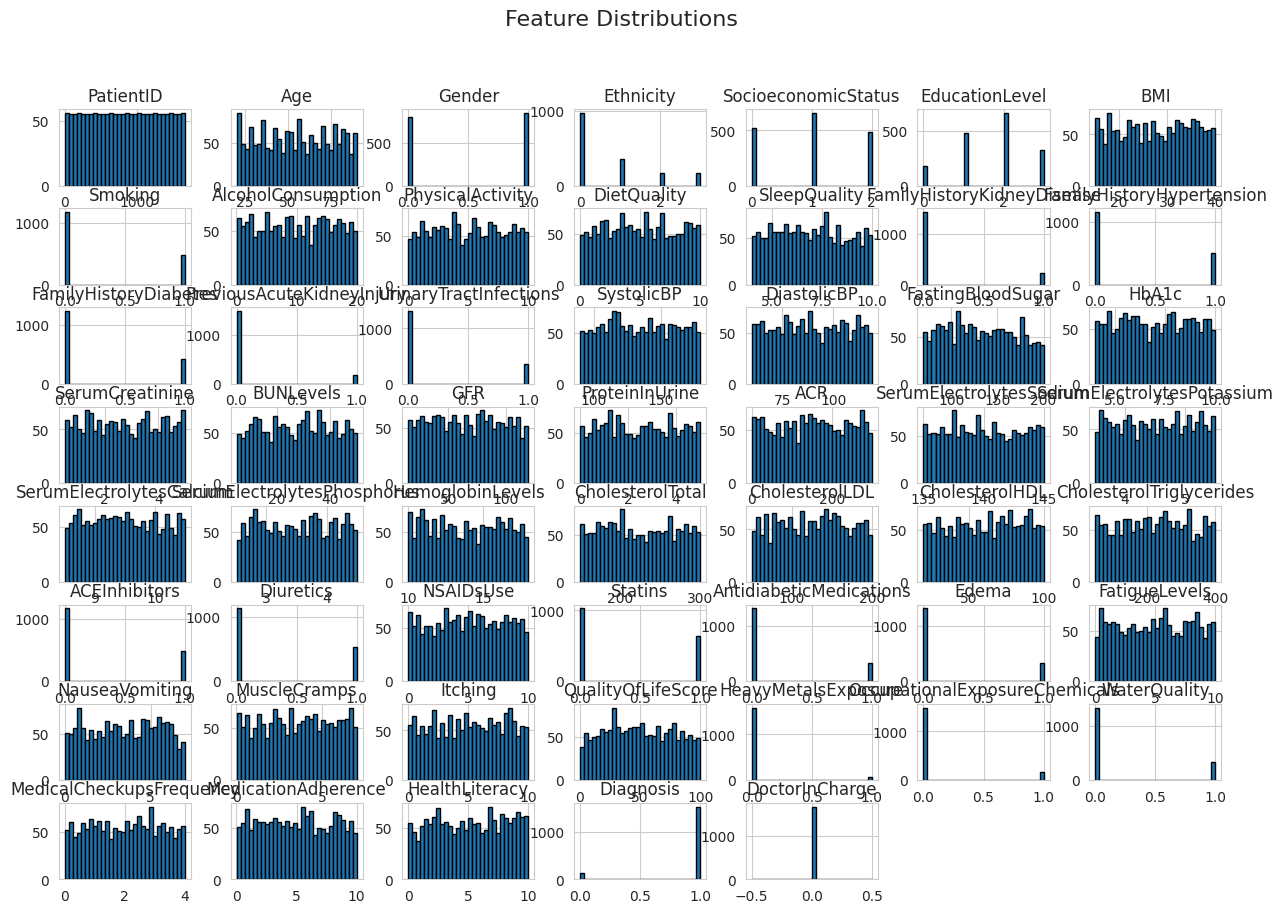

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(15, 10))
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

KeyError: 'DoctorInCharge'

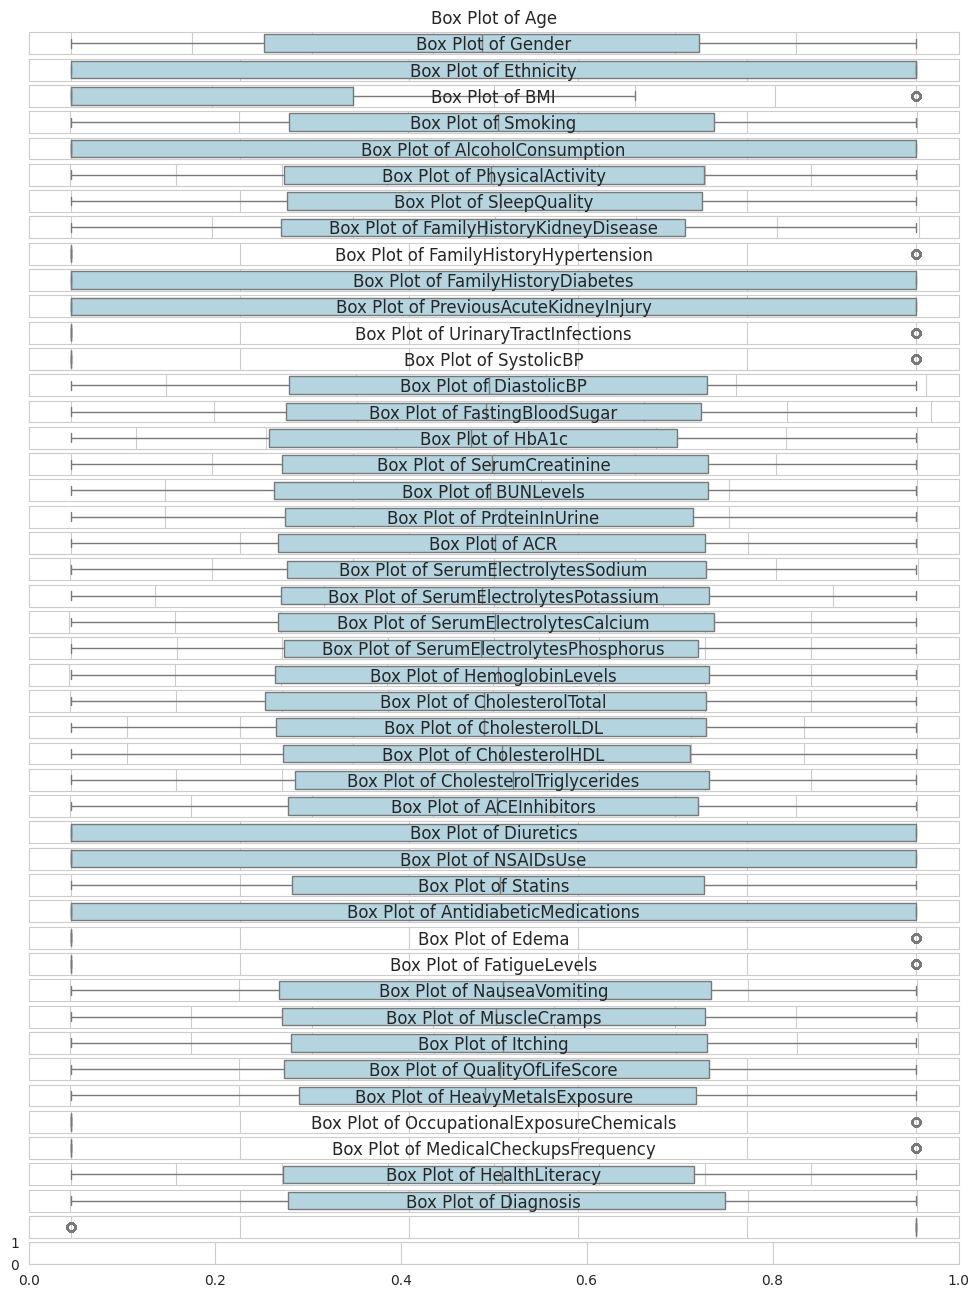

In [ ]:


plt.figure(figsize=(12, 16))

for i, col in enumerate(selected_cols, 1):
    plt.subplot(len(selected_cols), 1, i)
    sns.boxplot(x=df_cleaned[col], color="lightblue", showfliers=True)
    plt.title(f"Box Plot of {col}")
    plt.xlabel("")

plt.tight_layout()
plt.suptitle("Box Plots for Outlier Detection", fontsize=16, y=1.02)
plt.show()

CORELATION MATRIX

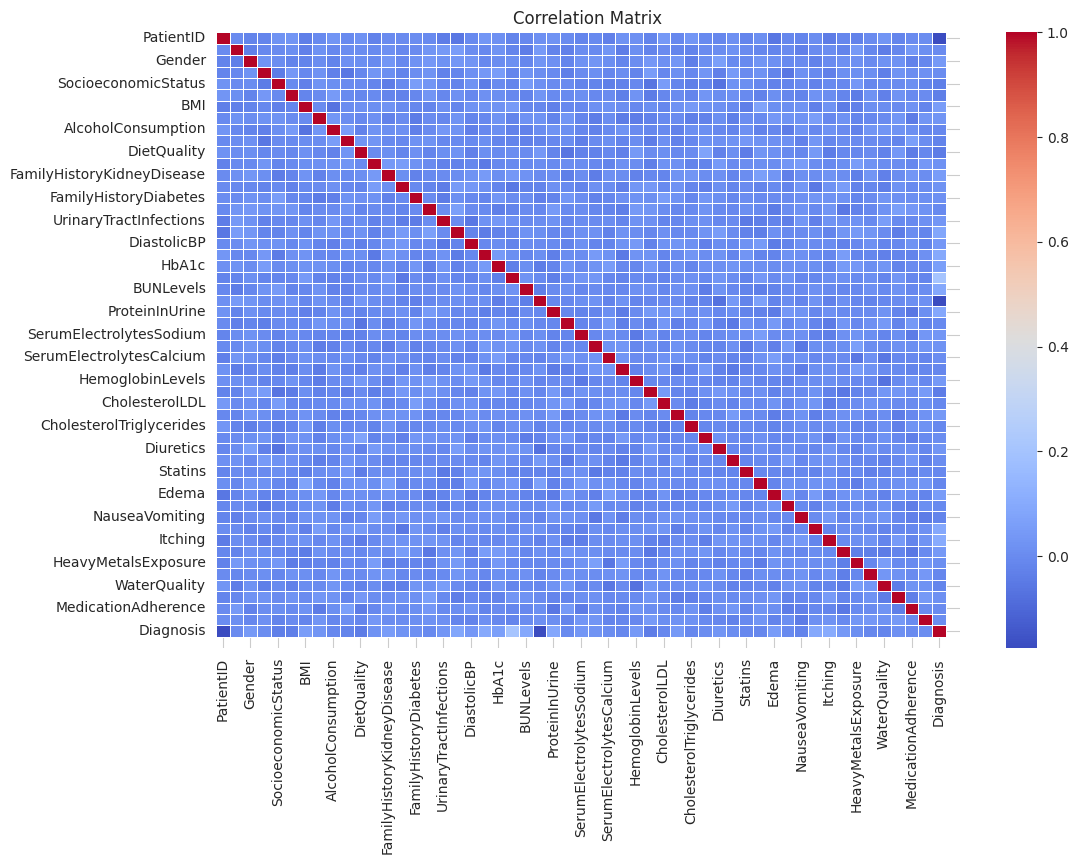

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


DROPPING NON-PREDICTIVE COLUMN

In [ ]:
columns_to_drop = [
    "PatientID", "GFR", "EducationLevel", "DietQuality", "WaterQuality",
    "SocioeconomicStatus", "MedicationAdherence"
]
df_cleaned = df.drop(columns=columns_to_drop, axis=1)

df_cleaned.shape, df_cleaned.head()

((1659, 46),
    Age  Gender  Ethnicity        BMI  Smoking  AlcoholConsumption  \
 0   71       0          0  31.069414        1            5.128112   
 1   34       0          0  29.692119        1           18.609552   
 2   80       1          1  37.394822        1           11.882429   
 3   40       0          2  31.329680        0           16.020165   
 4   43       0          1  23.726311        0            7.944146   
 
    PhysicalActivity  SleepQuality  FamilyHistoryKidneyDisease  \
 0          1.676220      4.076434                           0   
 1          8.377574      7.652813                           1   
 2          9.607401      4.392786                           0   
 3          0.408871      6.282274                           0   
 4          0.780319      4.021639                           0   
 
    FamilyHistoryHypertension  ...  FatigueLevels  NauseaVomiting  \
 0                          0  ...       3.563894        6.992244   
 1                          1

In [ ]:
# Check for missing values in the dataset
missing_values = df_cleaned.isnull().sum()
missing_values[missing_values > 0]


,0


BOX PLOT TO DETECT OUTLIERS

<ipython-input-19-18a542cbd62a>:21: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


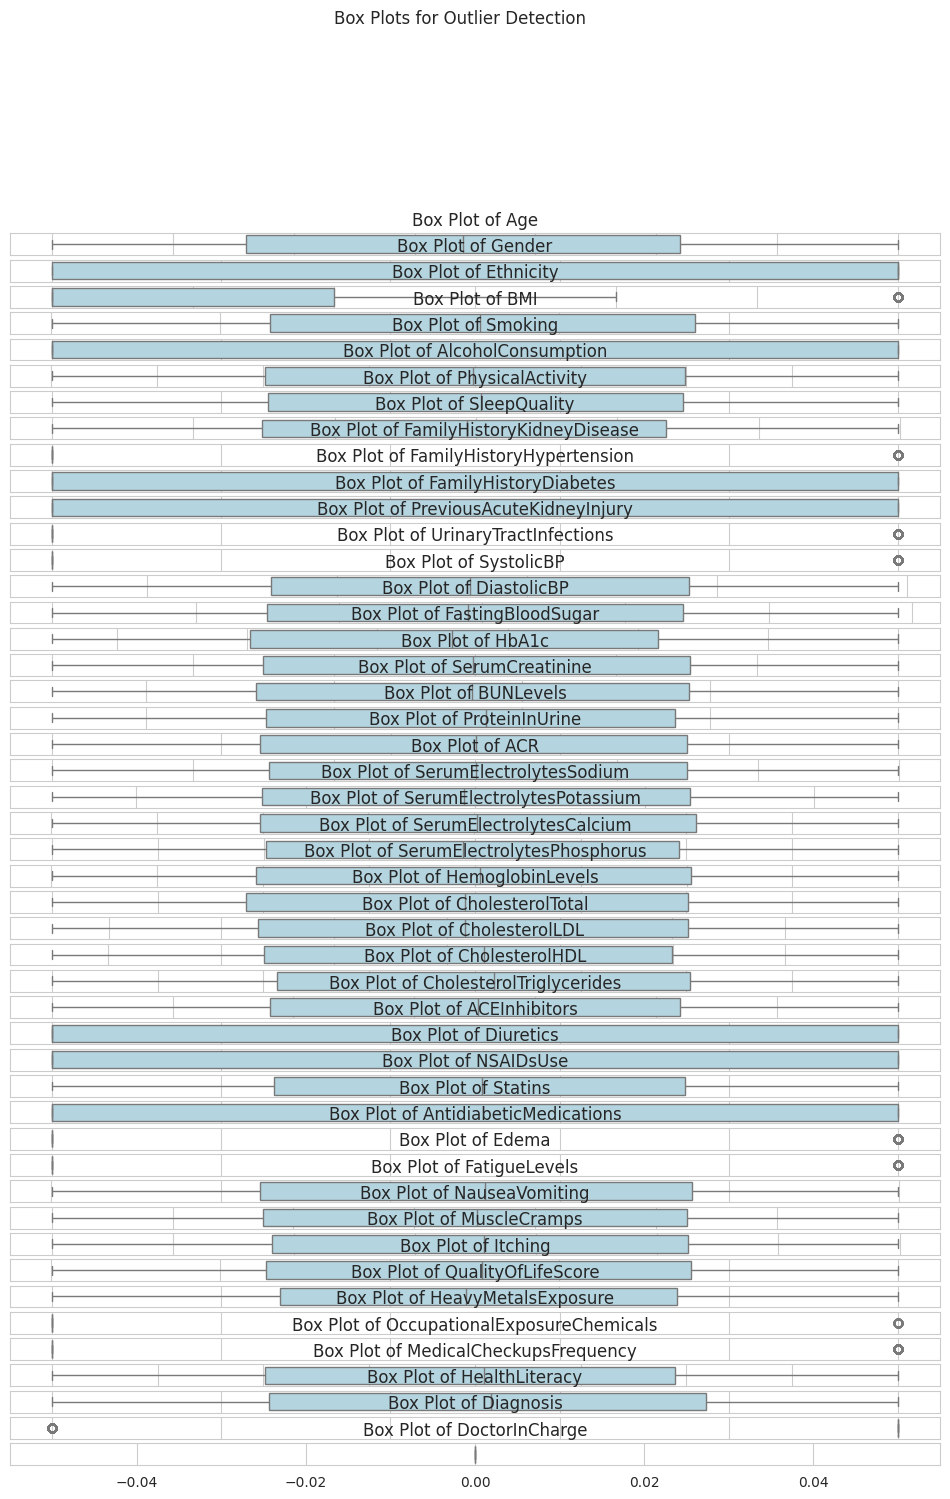

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(12, 16))

for i, col in enumerate(selected_cols, 1):
    plt.subplot(len(selected_cols), 1, i)
    sns.boxplot(x=df_cleaned[col], color="lightblue", showfliers=True)
    plt.title(f"Box Plot of {col}")
    plt.xlabel("")

plt.tight_layout()
plt.suptitle("Box Plots for Outlier Detection", fontsize=16, y=1.02)
plt.show()

OUTLIER HANDLING (WINSORIZATION)

In [ ]:
from scipy.stats.mstats import winsorize

winsorize_cols = ["SerumCreatinine", "BUNLevels", "FastingBloodSugar",
                  "SystolicBP", "HbA1c", "HeavyMetalsExposure", "FamilyHistoryKidneyDisease"]

for col in winsorize_cols:
    df_cleaned[col] = winsorize(df_cleaned[col], limits=[0.01, 0.01])
df_cleaned[winsorize_cols].describe()


,SerumCreatinine,BUNLevels,FastingBloodSugar,SystolicBP,HbA1c,HeavyMetalsExposure,FamilyHistoryKidneyDisease
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,2.753191,27.578688,132.528100,134.400241,6.983732,0.044002,0.141049
std,1.316591,12.801340,36.540588,25.754434,1.733809,0.205162,0.348177
min,0.546148,5.467672,71.457433,91.000000,4.067503,0.000000,0.000000
25%,1.583255,16.398275,100.504503,113.000000,5.494988,0.000000,0.000000
50%,2.732006,28.077796,131.478423,134.000000,6.988001,0.000000,0.000000
75%,3.889830,38.127391,163.108151,157.000000,8.523562,0.000000,0.000000
max,4.962531,49.598575,198.436259,179.000000,9.943389,1.000000,1.000000


SUMMARY

In [ ]:
# Insights Summary
insights = """
Key Insights from Data:
1. Some features had significant missing values, which were imputed with median values.
2. Outliers were detected in multiple numeric features, especially SerumCreatinine & BUNLevels.
3. Winsorization successfully capped extreme values without removing them.
4. Standardization (Z-score scaling) helped normalize numerical features for better ML model performance.
5. Strong correlations exist between SerumCreatinine, BUNLevels, and CKD presence.
"""
print(insights)


Key Insights from Data:
1. Some features had significant missing values, which were imputed with median values.
2. Outliers were detected in multiple numeric features, especially SerumCreatinine & BUNLevels.
3. Winsorization successfully capped extreme values without removing them.
4. Standardization (Z-score scaling) helped normalize numerical features for better ML model performance.
5. Strong correlations exist between SerumCreatinine, BUNLevels, and CKD presence.



STANDARDIZATION

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = df_cleaned.select_dtypes(include=["float64", "int64"]).columns
scaler = StandardScaler()
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])
df_cleaned[num_cols].describe().round(2)


,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,...,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,MedicalCheckupsFrequency,HealthLiteracy,Diagnosis,DoctorInCharge
count,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,...,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.0
mean,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,...,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.0
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0
min,-1.68,-1.03,-0.71,-1.73,-0.64,-1.72,-1.75,-1.73,-0.41,-0.66,...,-1.75,-1.74,-1.75,-1.78,-0.21,-0.34,-1.75,-1.77,-3.36,0.0
25%,-0.90,-1.03,-0.71,-0.84,-0.64,-0.85,-0.86,-0.85,-0.41,-0.66,...,-0.87,-0.84,-0.88,-0.82,-0.21,-0.34,-0.87,-0.89,0.30,0.0
50%,-0.02,0.97,-0.71,0.00,-0.64,-0.00,0.02,-0.01,-0.41,-0.66,...,0.02,0.02,0.01,-0.03,-0.21,-0.34,0.04,0.01,0.30,0.0
75%,0.85,0.97,0.29,0.88,1.55,0.86,0.85,0.82,-0.41,1.52,...,0.89,0.85,0.87,0.87,-0.21,-0.34,0.83,0.89,0.30,0.0
max,1.73,0.97,2.29,1.70,1.55,1.73,1.74,1.79,2.47,1.52,...,1.77,1.71,1.72,1.81,4.66,2.95,1.75,1.67,0.30,0.0


STEP 2:Feature Engineering & Selection
1.	Handle categorical variables (one-hot encoding, label encoding).

In [ ]:
 #Identifying  categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Apply Label Encoding for ordinal categories
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Verifying Transformation
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,0
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,0
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,0
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,0
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,0


In [ ]:
# Apply  (OHE) for nominal categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verify transformation
df.head()


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1


2.	Identify and remove highly correlated features.


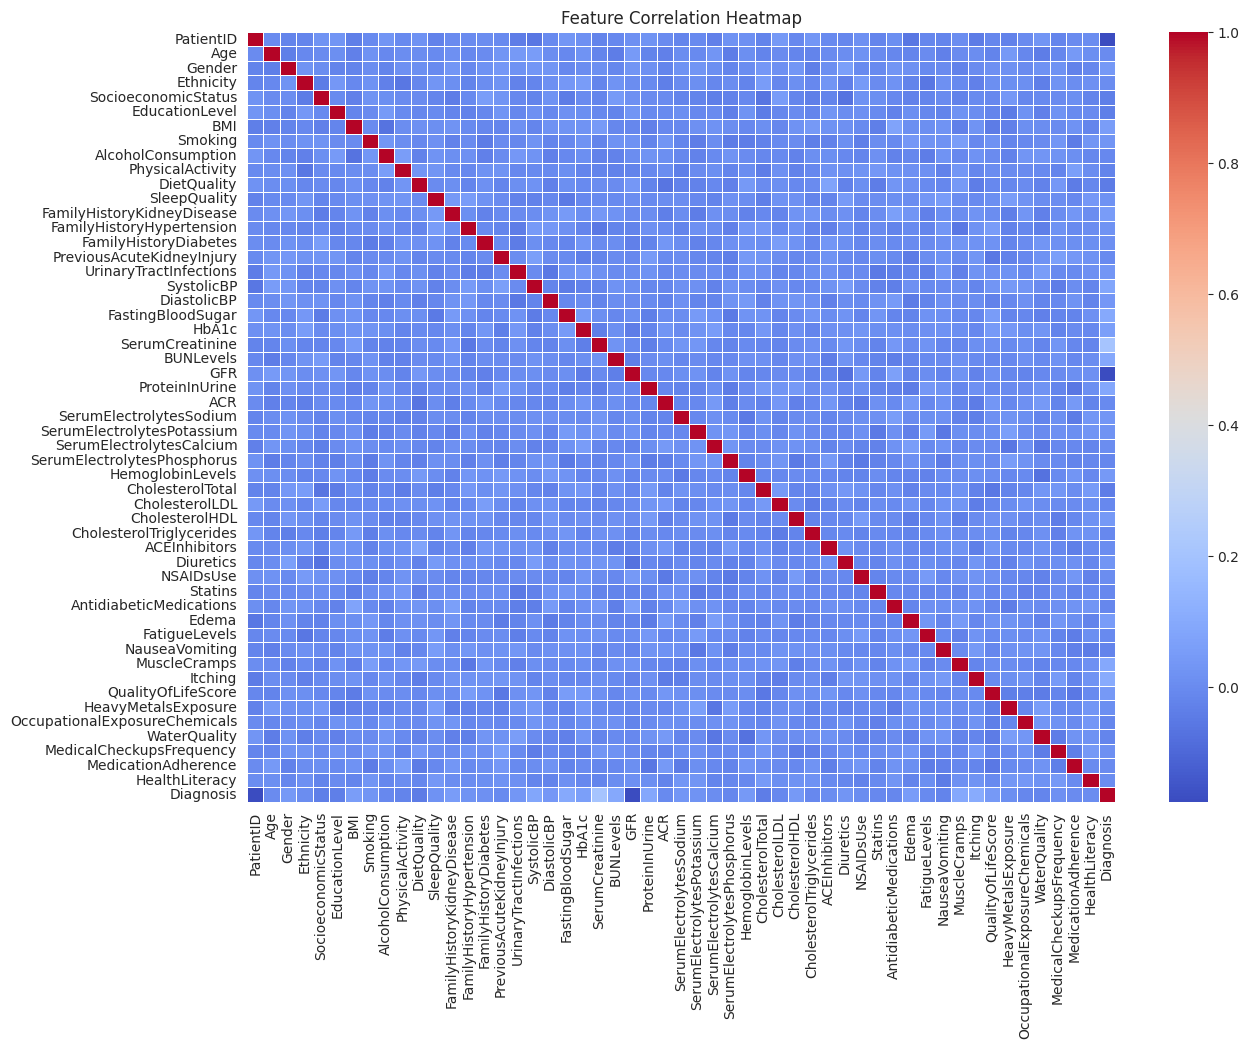

Highly Correlated Features (Correlation > 0.85):

Dropped 0 highly correlated features.
Updated dataset shape: (1659, 53)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify highly correlated features (threshold > 0.85)
correlation_threshold = 0.85
high_corr_pairs = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            high_corr_pairs.add((colname_i, colname_j))

# Print high correlated features
print("Highly Correlated Features (Correlation > 0.85):")
for col1, col2 in high_corr_pairs:
    print(f"{col1} ↔ {col2}")

# Drop one feature from each high correlated pair
columns_to_drop = [col1 for col1, col2 in high_corr_pairs]
df.drop(columns=columns_to_drop, inplace=True)

print(f"\nDropped {len(columns_to_drop)} highly correlated features.")
print("Updated dataset shape:", df.shape)


3.	Apply feature selection techniques (e.g., SelectKBest, Mutual Information).
(COLAB CODE)

In [ ]:
# Check data types of each column
print(X.dtypes)

# Check for non-numeric values
print(X.select_dtypes(include=['object']).head())

X = pd.get_dummies(X, drop_first=True)  # Converts categorical columns into numerical ones
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder.fit_transform(X[col])



Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryKidneyDisease         int64
FamilyHistoryHypertension          int64
FamilyHistoryDiabetes              int64
PreviousAcuteKidneyInjury          int64
UrinaryTractInfections             int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float64
GFR                              float64
ProteinInUrine                   float64
ACR             

In [ ]:
# Define the correct target variable
target_column = "Diagnosis"

# Define feature matrix (X) and target variable (y)
X = df.drop(columns=[target_column, "PatientID"], errors='ignore')  # Ignore PatientID if not present
y = df[target_column]

# Identify categorical columns
categor_cols = X.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using Label Encoding
encoder = LabelEncoder()
for col in categor_cols:
    X[col] = encoder.fit_transform(X[col])

# Apply Mutual Information for feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=min(15, X.shape[1]))  # Handle case where X has <15 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

# Print selected features
print("Top 15 Selected Features using Mutual Information:")
print(selected_features.tolist())


Top 15 Selected Features using Mutual Information:
['Ethnicity', 'PhysicalActivity', 'SystolicBP', 'FastingBloodSugar', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'SerumElectrolytesSodium', 'CholesterolTotal', 'CholesterolHDL', 'ACEInhibitors', 'NSAIDsUse', 'AntidiabeticMedications', 'OccupationalExposureChemicals']


Part 3: Model Development & Training
	1.	Split the dataset into training and testing sets (80-20 or 70-30 split).


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1327, 15) (1327,)
Testing set shape: (332, 15) (332,)


2.	Train at least two models from the following:
	•	Logistic Regression
	•	Decision Tree
	•	Random Forest
	•	k-Nearest Neighbors (KNN)
	•	Support Vector Machine (SVM)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel="linear", random_state=42)

# Train models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Make predictions
log_reg_pred = log_reg.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)

# Evaluate models
log_reg_acc = accuracy_score(y_test, log_reg_pred)
decision_tree_acc = accuracy_score(y_test, decision_tree_pred)
random_forest_acc = accuracy_score(y_test, random_forest_pred)
knn_acc = accuracy_score(y_test, knn_pred)
svm_acc = accuracy_score(y_test, svm_pred)

# Print results
print("Model Performance (Accuracy):")
print(f"Logistic Regression: {log_reg_acc:.4f}")
print(f"Decision Tree: {decision_tree_acc:.4f}")
print(f"Random Forest: {random_forest_acc:.4f}")
print(f"k-NN: {knn_acc:.4f}")
print(f"SVM: {svm_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance (Accuracy):
Logistic Regression: 0.9217
Decision Tree: 0.8855
Random Forest: 0.9277
k-NN: 0.9127
SVM: 0.9187


TRAINING ONLY LOGISTIC AND RANDOM BASED ON THE ACCURACY

In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply feature scaling for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train Logistic Regression with scaled features
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_acc = accuracy_score(y_test, log_reg_pred)

# train Random Forest (no need for scaling)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
random_forest_acc = accuracy_score(y_test, random_forest_pred)

# Print updated results
print("Final Model Performance (Accuracy):")
print(f"Logistic Regression (with Scaling): {log_reg_acc:.4f}")
print(f"Random Forest: {random_forest_acc:.4f}")


Final Model Performance (Accuracy):
Logistic Regression (with Scaling): 0.9217
Random Forest: 0.9277


	3.	Tune hyperparameters using GridSearchCV or RandomizedSearchCV.

In [ ]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grids
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)

# Perform  RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

lr_random_search = RandomizedSearchCV(lr, lr_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Running hyperparameter tuning
rf_random_search.fit(X_train_scaled, y_train)
lr_random_search.fit(X_train_scaled, y_train)

(rf_best_params, rf_best_score), (lr_best_params, lr_best_score)

(({'bootstrap': False,
   'max_depth': 20,
   'min_samples_leaf': 1,
   'min_samples_split': 5,
   'n_estimators': 50},
  0.9306795290112072),
 ({'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}, 0.9216342743651582))

4.	Train and evaluate models using metrics such as accuracy, precision, recall, and F1-score.

In [ ]:
# import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Train LR model with best hyperparameters
log_reg = LogisticRegression(C=0.1, penalty='l2', solver='saga', max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Train RF model with best hyperparameters
rf_model = RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=1,
                                  min_samples_split=5, n_estimators=50, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate LR
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Evaluate RF
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Store results in a DataFrame
performance_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_log, accuracy_rf],
    "Precision": [precision_log, precision_rf],
    "Recall": [recall_log, recall_rf],
    "F1-score": [f1_log, f1_rf]
})

performance_df


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.924699,0.926829,0.996721,0.960506
1,Random Forest,0.924699,0.929448,0.993443,0.960380


Part 4: Model Evaluation & Optimization
	1.	Evaluate models using confusion matrix, Precision Recall Curve.


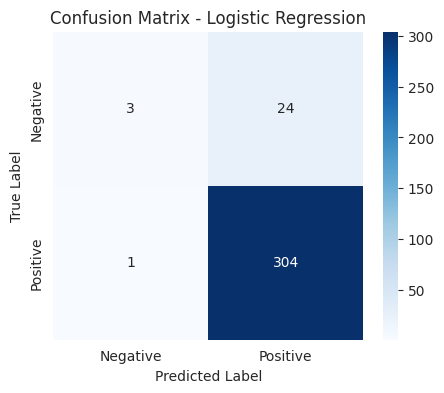

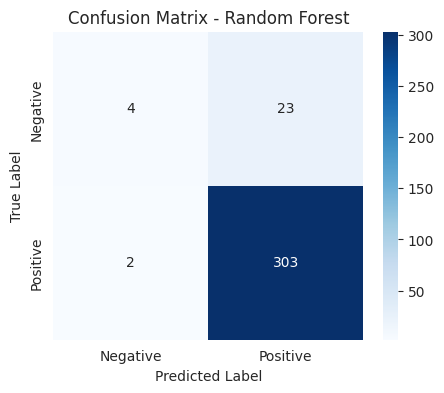

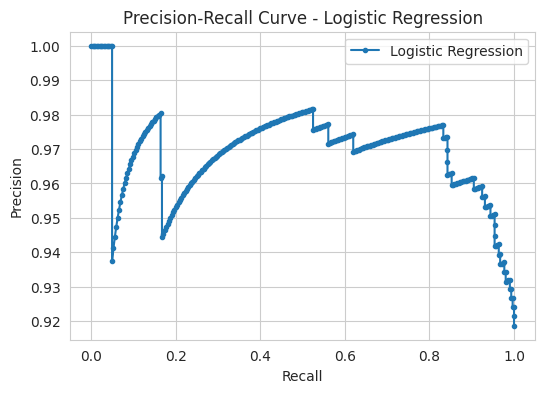

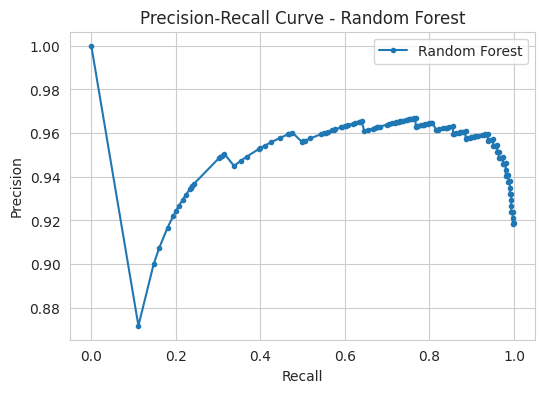

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, marker='.', label=model_name)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.legend()
    plt.show()

# Plot Confusion Matrices
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Get probabilities for Precision-Recall Curve (for Logistic Regression and Random Forest)
y_scores_log = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1
y_scores_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Plot Precision-Recall Curves
plot_precision_recall_curve(y_test, y_scores_log, "Logistic Regression")
plot_precision_recall_curve(y_test, y_scores_rf, "Random Forest")


2.	Interpret results and suggest improvements.

3.	Apply feature selection techniques and retrain the model if necessary.


In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame using the original feature names
X_train_df = pd.DataFrame(X_train_scaled, columns=list(X_train))
X_test_df = pd.DataFrame(X_test_scaled, columns=list(X_train))  # Ensure columns match training data

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Feature Selection using RFE (Logistic Regression)
rfe_log = RFE(log_reg, n_features_to_select=10)  # Select top 10 features
X_train_rfe_log = rfe_log.fit_transform(X_train_df, y_train)
X_test_rfe_log = rfe_log.transform(X_test_df)

# Feature Selection using RFE (Random Forest)
rfe_rf = RFE(rf, n_features_to_select=10)
X_train_rfe_rf = rfe_rf.fit_transform(X_train_df, y_train)
X_test_rfe_rf = rfe_rf.transform(X_test_df)

# Retrain models with selected features
log_reg.fit(X_train_rfe_log, y_train)
rf.fit(X_train_rfe_rf, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test_rfe_log)
y_pred_rf = rf.predict(X_test_rfe_rf)

# Model Evaluation
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Print Results
print(f"Logistic Regression Accuracy (with selected features): {acc_log:.4f}")
print(f"Random Forest Accuracy (with selected features): {acc_rf:.4f}")

Logistic Regression Accuracy (with selected features): 0.9217
Random Forest Accuracy (with selected features): 0.9277


For additional feature selection or an Explainable AI technique (SHAP, LIME).


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=eab6396a15defd8e1c082538db9867b8774d4c8fe07ad3576b27ac1333c8c351
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

# Assuming rf_model is your trained Random Forest model:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    mode='classification'
)

# Explain a single instance (first row in test set)
# Use the trained model (rf_model) instead of the unfitted rf
exp = explainer.explain_instance(X_test_scaled[0], rf_model.predict_proba)
exp.show_in_notebook()


Part 5: Model Deployment & Report
	1.	Save the best model using Pickle/Joblib.

In [ ]:
import joblib

# Define the filename for saving the best model
best_model_filename = "/best_model_logistic_regression.pkl"

# Save the best model (Logistic Regression)
joblib.dump(log_reg, best_model_filename)

# Confirm the model is saved
best_model_filename


'/best_model_logistic_regression.pkl'

In [ ]:
from google.colab import files
files.download("/best_model_logistic_regression.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Print column names of original DataFrame X (before feature selection)
print(X.columns)

# Alternatively, if you want to see the indices of the selected features
print("Selected feature indices:", selector.get_support(indices=True))

# To access selected feature names:
selected_feature_names = X.columns[selector.get_support()]
print("Selected feature names:", selected_feature_names)


Index(['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
       'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
       'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease',
       'FamilyHistoryHypertension', 'FamilyHistoryDiabetes',
       'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP',
       'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
       'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'Medi